In [16]:
import json
import pandas as pd
import numpy as np
from tqdm import tqdm

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import prompt_utils

import ast

def create_matrix(co_occur_prob, classes):
    # Initialize an empty matrix with zeroes
    matrix = np.zeros((len(classes), len(classes)))
    df = pd.DataFrame(matrix, index=classes, columns=classes)

    # Fill the matrix with the co-occurrence probabilities
    for pair, probability in co_occur_prob.items():
        try:
            df.loc[pair[0], pair[1]] = probability
        except KeyError:
            df.loc[pair[0], pair[1]] = 0

    return df

def save_co_occur_dict(co_occur_prob, path):
    # Convert keys from tuple to str
    str_key_dict = {str(key): val for key, val in co_occur_prob.items()}
    with open(path, 'w') as f:
        json.dump(str_key_dict, f)

def load_co_occur_dict(path):
    with open(path, 'r') as f:
        str_key_dict = json.load(f)
    # Convert keys back from str to tuple
    tuple_key_dict = {tuple(key.replace("'", "").strip('()').split(', ')): val for key, val in str_key_dict.items()}
    return tuple_key_dict


def co_occurrence(annotations):
    label_count = {}
    co_occur_count = {}
    
    for labels in annotations:
        for label in labels:
            label_count[label] = label_count.get(label, 0) + 1
            for co_label in labels:
                if label != co_label:
                    pair = tuple([label, co_label])
                    co_occur_count[pair] = co_occur_count.get(pair, 0) + 1

    co_occur_prob = {pair: count/label_count[pair[0]] for pair, count in co_occur_count.items()}

    return co_occur_prob

labeled_data_filename = "../data/labeled_data/generic_test_0.json"

dfs = []
with open(labeled_data_filename) as f:
    data = json.load(f)
df = pd.DataFrame(data["train"])
dfs.append(df)
df = pd.DataFrame(data["test"])
dfs.append(df)
df = pd.DataFrame(data["valid"])
dfs.append(df)
df_all = pd.concat(dfs)

co_occurrence_probabilities = co_occurrence(df_all["annotations"])

print(co_occurrence_probabilities)
# Assuming co_occurrence_probabilities is already defined:
save_co_occur_dict(co_occurrence_probabilities, '../reports/co_occur_dict.json')

# Later, when you need to load the co-occurrence probabilities:
co_occurrence_probabilities = load_co_occur_dict('../reports/co_occur_dict.json')
print(co_occurrence_probabilities)

{('Health', 'Justice/Crime'): 0.05384615384615385, ('Health', 'Macroeconomics/Economic Regulation'): 0.07692307692307693, ('Justice/Crime', 'Health'): 0.019746121297602257, ('Justice/Crime', 'Macroeconomics/Economic Regulation'): 0.018335684062059238, ('Macroeconomics/Economic Regulation', 'Health'): 0.0641025641025641, ('Macroeconomics/Economic Regulation', 'Justice/Crime'): 0.041666666666666664, ('Justice/Crime', 'Labor/Employment'): 0.015514809590973202, ('Labor/Employment', 'Justice/Crime'): 0.088, ('Environment', 'Justice/Crime'): 0.06944444444444445, ('Justice/Crime', 'Environment'): 0.007052186177715092, ('Justice/Crime', 'War/Terror'): 0.07193229901269393, ('War/Terror', 'Justice/Crime'): 0.04271356783919598, ('Government/Public', 'Justice/Crime'): 0.1046133853151397, ('Justice/Crime', 'Government/Public'): 0.22708039492242596, ('Government/Public', 'War/Terror'): 0.10721247563352826, ('War/Terror', 'Government/Public'): 0.13819095477386933, ('Education', 'Health'): 0.078947368

{('Health', 'Justice/Crime'): 0.05384615384615385, ('Health', 'Macroeconomics/Economic Regulation'): 0.07692307692307693, ('Justice/Crime', 'Health'): 0.019746121297602257, ('Justice/Crime', 'Macroeconomics/Economic Regulation'): 0.018335684062059238, ('Macroeconomics/Economic Regulation', 'Health'): 0.0641025641025641, ('Macroeconomics/Economic Regulation', 'Justice/Crime'): 0.041666666666666664, ('Justice/Crime', 'Labor/Employment'): 0.015514809590973202, ('Labor/Employment', 'Justice/Crime'): 0.088, ('Environment', 'Justice/Crime'): 0.06944444444444445, ('Justice/Crime', 'Environment'): 0.007052186177715092, ('Justice/Crime', 'War/Terror'): 0.07193229901269393, ('War/Terror', 'Justice/Crime'): 0.04271356783919598, ('Government/Public', 'Justice/Crime'): 0.1046133853151397, ('Justice/Crime', 'Government/Public'): 0.22708039492242596, ('Government/Public', 'War/Terror'): 0.10721247563352826, ('War/Terror', 'Government/Public'): 0.13819095477386933, ('Education', 'Health'): 0.078947368

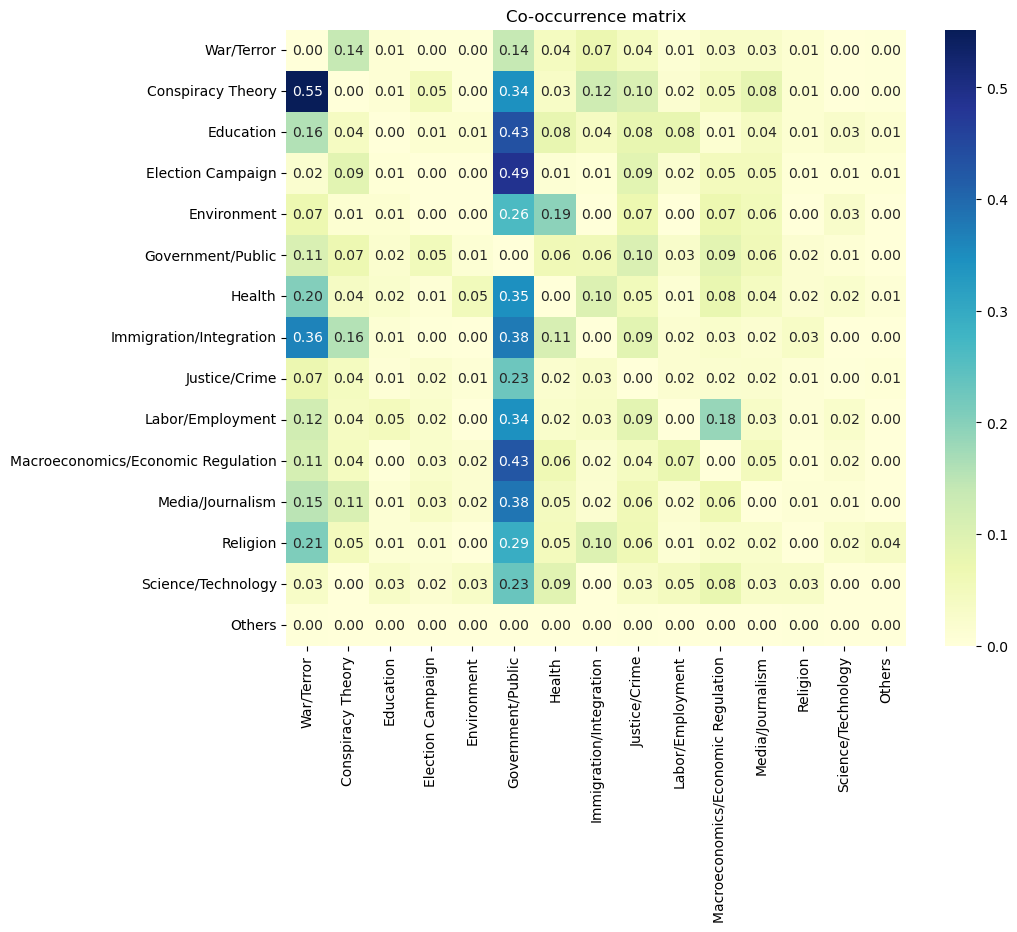

In [17]:
print(co_occurrence_probabilities)
# Assuming co_occurrence_probabilities and classes are already defined:
co_occur_matrix = create_matrix(co_occurrence_probabilities, prompt_utils.ALL_LABELS)
print(co_occur_matrix)
# Now plot the matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occur_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Co-occurrence matrix")
plt.show()